## Import Libraries

In [1]:
import math, time, random, datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score, roc_curve,auc
import warnings
from sklearn.exceptions import FitFailedWarning
warnings.simplefilter('ignore', FitFailedWarning)
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
from keras.utils import np_utils
from imblearn.over_sampling import SMOTE

In [4]:
from sklearn.model_selection import train_test_split 

In [5]:
from imblearn.over_sampling import SMOTE

In [6]:
from sklearn.model_selection import train_test_split 

In [7]:
from sklearn.preprocessing import StandardScaler

## Import IBM employee dataset

In [8]:
data = pd.read_csv('IBM-HR-Employee-Attrition.csv')

## Explore data

In [9]:
pd.set_option('display.max_columns', None)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [10]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
# drop the unnecessary columns
#Drop columns that are employee feedback
data.drop(['EmployeeNumber','Over18','StandardHours','EmployeeCount','DailyRate','Education',
           'EnvironmentSatisfaction','HourlyRate','JobInvolvement', 'JobLevel','JobSatisfaction',
          'MonthlyRate','RelationshipSatisfaction','WorkLifeBalance',],axis=1,inplace=True)

In [12]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [13]:
data['Attrition'] = data['Attrition'].apply(lambda x:1 if x == "Yes" else 0 )
#data['OverTime'] = data['OverTime'].apply(lambda x:1 if x =="Yes" else 0 )

In [14]:
data['Attrition'].value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [15]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [16]:
data.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [17]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,Life Sciences,Female,Sales Executive,Single,5993,8,Yes,11,3,0,8,0,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,Life Sciences,Male,Research Scientist,Married,5130,1,No,23,4,1,10,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,Other,Male,Laboratory Technician,Single,2090,6,Yes,15,3,0,7,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,Life Sciences,Female,Research Scientist,Married,2909,1,Yes,11,3,0,8,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,Medical,Male,Laboratory Technician,Married,3468,9,No,12,3,1,6,3,2,2,2,2


## One hot encoding

In [18]:
#Create list with categorical features' names.
nonum_feats_names = ['BusinessTravel', 'Department','EducationField', 'Gender', 'JobRole', 'MaritalStatus','OverTime']

#Create list with numerical features' names.
num_cols_names = ['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [19]:
#Assign appropriate data type to categorical variables.
nonum_feats = data[nonum_feats_names].astype('category')
nonum_feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   BusinessTravel  1470 non-null   category
 1   Department      1470 non-null   category
 2   EducationField  1470 non-null   category
 3   Gender          1470 non-null   category
 4   JobRole         1470 non-null   category
 5   MaritalStatus   1470 non-null   category
 6   OverTime        1470 non-null   category
dtypes: category(7)
memory usage: 11.3 KB


In [20]:
#One-hot-code categorical variables and dropping the reference value.
ohc_feats = pd.get_dummies(nonum_feats,drop_first=True)
ohc_feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   BusinessTravel_Travel_Frequently   1470 non-null   uint8
 1   BusinessTravel_Travel_Rarely       1470 non-null   uint8
 2   Department_Research & Development  1470 non-null   uint8
 3   Department_Sales                   1470 non-null   uint8
 4   EducationField_Life Sciences       1470 non-null   uint8
 5   EducationField_Marketing           1470 non-null   uint8
 6   EducationField_Medical             1470 non-null   uint8
 7   EducationField_Other               1470 non-null   uint8
 8   EducationField_Technical Degree    1470 non-null   uint8
 9   Gender_Male                        1470 non-null   uint8
 10  JobRole_Human Resources            1470 non-null   uint8
 11  JobRole_Laboratory Technician      1470 non-null   uint8
 12  JobRole_Manager     

In [21]:
ohc_feats

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1466,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1467,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1468,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [22]:
ohc_data = pd.concat([data[num_cols_names], ohc_feats],axis=1)

In [23]:
ohc_data

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,5993,8,11,3,0,8,0,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,8,5130,1,23,4,1,10,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,2,2090,6,15,3,0,7,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,3,2909,1,11,3,0,8,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,2,3468,9,12,3,1,6,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,2571,4,17,3,1,17,3,5,2,0,3,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1466,39,6,9991,4,15,3,1,9,5,7,7,1,7,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1467,27,4,6142,1,20,4,1,6,0,6,2,0,3,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1468,49,2,5390,2,14,3,0,17,3,9,6,0,8,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [24]:
target = data.Attrition


In [25]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier




# Model on features selected from correlation analysis


In [26]:
X_train, X_test, y_train, y_test = train_test_split(ohc_data,target,random_state=123)


In [27]:
def plot_feat_importance(clf,index):
    '''Plot the 0 most important features for a classifier model in a bar chart
    according to importance'''
    feat_importances = pd.DataFrame(clf.feature_importances_, index=index, columns=['Score'])
    feat_importances = feat_importances.sort_values(by='Score',ascending=True).tail(10)
    feat_importances.plot(kind='barh', title='Top 10 Important Features',legend=False)
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show();
    

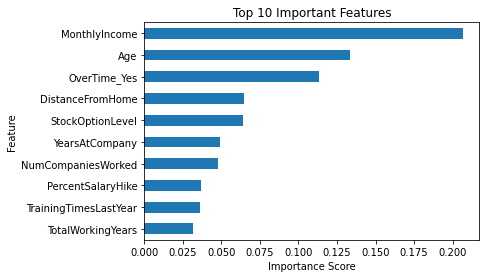

In [28]:
clf = GradientBoostingClassifier()
clf.fit(X_train,y_train)
plot_feat_importance(clf, ohc_data.columns)

In [29]:
y_pred = clf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy:  0.904891304347826
Precision:  0.76
Recall:  0.3958333333333333
Confusion Matrix:
 [[314   6]
 [ 29  19]]


In [30]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred))
  print("Recall: ",recall_score(y_test,y_pred))
  print("F1 score:",f1_score(y_test,y_pred))  
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

In [31]:
train_predict_evaluate(LogisticRegression(max_iter=100000),X_train,y_train,X_test)

Accuracy:  0.8994565217391305
Precision:  0.72
Recall:  0.375
F1 score: 0.4931506849315069
Confusion Matrix:
 [[313   7]
 [ 30  18]]


In [32]:
train_predict_evaluate(RandomForestClassifier(random_state=42),X_train,y_train,X_test)

Accuracy:  0.8967391304347826
Precision:  0.8571428571428571
Recall:  0.25
F1 score: 0.3870967741935483
Confusion Matrix:
 [[318   2]
 [ 36  12]]


In [33]:
train_predict_evaluate(DecisionTreeClassifier(),X_train,y_train,X_test)

Accuracy:  0.7961956521739131
Precision:  0.3246753246753247
Recall:  0.5208333333333334
F1 score: 0.4
Confusion Matrix:
 [[268  52]
 [ 23  25]]


## Balance data
### stratify target and standarization of input data

In [34]:
#Create a final dataframe with all numerical variables in the first columns.
final_df = pd.concat([ohc_data[num_cols_names],ohc_feats],axis=1)

#Create final train and test sets startified according to the target variable. 
X_train, X_test, y_train, y_test = train_test_split(final_df,target, test_size = 0.30,stratify=target, 
                                                    random_state=123)

In [35]:
'''Scaling the data first fitting it and transforming the training set
to later aply the fit to transform the test set.'''
#Instantiate Satandard Scaler
scaler = StandardScaler()
#Fit transform the numerical features in the training dataset to a new dataframe
scaled_numfeats_train = pd.DataFrame(scaler.fit_transform(X_train[num_cols_names]), 
                                     columns=num_cols_names, index= X_train.index)
#Integrate scaled values to the training set
for col in num_cols_names:
    X_train[col] = scaled_numfeats_train[col]
#Transform the numerical features inthe training dataset to a new dataframe
scaled_numfeats_test = pd.DataFrame(scaler.transform(X_test[num_cols_names]),
                                    columns=num_cols_names, index= X_test.index)
#Integrate scaled values to the test set
for col in num_cols_names:
    X_test[col] = scaled_numfeats_test[col]

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [36]:
train_predict_evaluate(RandomForestClassifier(random_state=42),X_train,y_train,X_test)

Accuracy:  0.8707482993197279
Precision:  0.85
Recall:  0.23943661971830985
F1 score: 0.3736263736263736
Confusion Matrix:
 [[367   3]
 [ 54  17]]


In [37]:
train_predict_evaluate(LogisticRegression(max_iter=100000),X_train,y_train,X_test)

Accuracy:  0.8798185941043084
Precision:  0.8214285714285714
Recall:  0.323943661971831
F1 score: 0.46464646464646464
Confusion Matrix:
 [[365   5]
 [ 48  23]]


In [38]:
train_predict_evaluate(DecisionTreeClassifier(),X_train,y_train,X_test)

Accuracy:  0.8027210884353742
Precision:  0.39473684210526316
Recall:  0.4225352112676056
F1 score: 0.40816326530612246
Confusion Matrix:
 [[324  46]
 [ 41  30]]


In [39]:
train_predict_evaluate(GradientBoostingClassifier(),X_train,y_train,X_test)

Accuracy:  0.8707482993197279
Precision:  0.71875
Recall:  0.323943661971831
F1 score: 0.44660194174757284
Confusion Matrix:
 [[361   9]
 [ 48  23]]


## Balance data using SMOTE

In [40]:
from imblearn.over_sampling import SMOTENC

In [41]:
cat_col_index = list(range(len(num_cols_names),34))
sm = SMOTENC(categorical_features=cat_col_index, random_state=123, sampling_strategy=.6)
X_trainres, y_trainres = sm.fit_resample(X_train, y_train)

In [42]:
#Find out the new target incidency rate.
pd.DataFrame(y_trainres,columns=['Attrition']).Attrition.value_counts(normalize=True)


0    0.625362
1    0.374638
Name: Attrition, dtype: float64

In [43]:
train_predict_evaluate(GradientBoostingClassifier(),X_trainres, y_trainres,X_test)

Accuracy:  0.8662131519274376
Precision:  0.6153846153846154
Recall:  0.4507042253521127
F1 score: 0.5203252032520326
Confusion Matrix:
 [[350  20]
 [ 39  32]]


In [44]:
train_predict_evaluate(DecisionTreeClassifier(), X_trainres, y_trainres,X_test)

Accuracy:  0.8049886621315193
Precision:  0.422680412371134
Recall:  0.5774647887323944
F1 score: 0.48809523809523814
Confusion Matrix:
 [[314  56]
 [ 30  41]]


In [45]:
train_predict_evaluate(LogisticRegression(max_iter=100000),X_trainres, y_trainres,X_test)

Accuracy:  0.8480725623582767
Precision:  0.5294117647058824
Recall:  0.5070422535211268
F1 score: 0.5179856115107914
Confusion Matrix:
 [[338  32]
 [ 35  36]]


In [46]:
train_predict_evaluate(RandomForestClassifier(random_state=42),X_trainres, y_trainres,X_test)

Accuracy:  0.8662131519274376
Precision:  0.6666666666666666
Recall:  0.3380281690140845
F1 score: 0.44859813084112155
Confusion Matrix:
 [[358  12]
 [ 47  24]]


# Training Model with all features - Balance using Random sampling

In [47]:
df = pd.read_csv('IBM-HR-Employee-Attrition.csv')

In [48]:
#Columns with string values
categorical_column = ['Attrition', 'BusinessTravel', 'Department','Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)

In [49]:
y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)


## Random sampling

In [50]:
# Random sampling

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42,replacement=True)
X_, Y1 = rus.fit_resample(X,y)
X1 = pd.DataFrame(X_,columns=X.columns)

ros = RandomOverSampler(random_state=42)
X_, Y2 = ros.fit_resample(X,y)
X2 = pd.DataFrame(X_,columns=X.columns)

### Undersampling

In [51]:
#Undersampling

X=X1
y=Y1

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

### Normalization of data

In [52]:
#Normalizing 

min_max_scaler = MinMaxScaler()
X_train_normalized = min_max_scaler.fit_transform(X_train)
X_test_normalized = min_max_scaler.transform(X_test)


### Hyper parameter tuning using Gridsearch

In [53]:
# Hyper parameter tuning for Logistic regression

def tune_hyperparameters(model,X,y):
  param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"],"solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
  grid_search = GridSearchCV(model,param_grid=param_grid)
  grid_search.fit(X,y)
  print("Best Params: ",grid_search.best_params_)

In [54]:
tune_hyperparameters(LogisticRegression(max_iter=100000),X_train_normalized,y_train)

Best Params:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


### Logistic Regression

In [55]:
train_predict_evaluate(LogisticRegression(max_iter=100000,C=0.1,penalty='l2',solver='liblinear'),X_train_normalized,y_train,X_test_normalized)

Accuracy:  0.7202797202797203
Precision:  0.7536231884057971
Recall:  0.6933333333333334
F1 score: 0.7222222222222223
Confusion Matrix:
 [[51 17]
 [23 52]]


### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [False],
    'max_depth': [100, 105, 110, 115],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,3,4],
    'n_estimators': [250,300,350,400]
}

In [57]:
# Grid Search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Results on the Grid Search model
train_predict_evaluate (grid_search, X_train, y_train, X_test)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  1.3min finished


Accuracy:  0.7482517482517482
Precision:  0.7746478873239436
Recall:  0.7333333333333333
F1 score: 0.7534246575342466
Confusion Matrix:
 [[52 16]
 [20 55]]


### Adaboost

In [58]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

def tune_hyperparameters(model,X,y):
  param_grid = {
      'n_estimators' : [10,50,250,1000],
      'learning_rate' : [0.001,0.01,0.1,1.0,10]
  }
  grid_search = GridSearchCV(model,param_grid=param_grid)
  grid_search.fit(X,y)
  print("Best Params: ",grid_search.best_params_)
  return grid_search.best_params_

In [59]:
decision_tree_parameters = {'criterion': 'entropy', 'max_depth': 6, 'max_features': 0.33334, 'max_leaf_nodes': 50, 'min_samples_leaf': 15, 'min_samples_split': 2, 'random_state': 0}

In [60]:
best_parameters_raw = tune_hyperparameters(AdaBoostClassifier(random_state=0,base_estimator=DecisionTreeClassifier(**decision_tree_parameters)),X_train,y_train)


Best Params:  {'learning_rate': 0.01, 'n_estimators': 1000}


In [61]:
train_predict_evaluate(AdaBoostClassifier(random_state=0,base_estimator=DecisionTreeClassifier(**decision_tree_parameters),**best_parameters_raw),X_train,y_train,X_test)

Accuracy:  0.7272727272727273
Precision:  0.75
Recall:  0.72
F1 score: 0.7346938775510204
Confusion Matrix:
 [[50 18]
 [21 54]]


### XGboost

In [62]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42)

parameters = {
    'max_depth': range (2, 10, 2),
    #'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [63]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:  2.8min
[Parallel(n_jobs=10)]: Done 120 out of 120 | elapsed: 12.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bytree=1,
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=4,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=42, silent=True,
                                     subsample=1),
             iid='deprecated', n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r

In [64]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=True, subsample=1)

In [65]:
train_predict_evaluate(grid_search.best_estimator_,X_train,y_train,X_test)

Accuracy:  0.7412587412587412
Precision:  0.8064516129032258
Recall:  0.6666666666666666
F1 score: 0.7299270072992701
Confusion Matrix:
 [[56 12]
 [25 50]]


### Oversampling

In [66]:
X=X2
y=Y2

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
X_train_normalized = min_max_scaler.fit_transform(X_train)
X_test_normalized = min_max_scaler.transform(X_test)



### Logistic regression

In [68]:
# Hyper parameter tuning for Logistic regression

def tune_hyperparameters(model,X,y):
  param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"],"solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
  grid_search = GridSearchCV(model,param_grid=param_grid)
  grid_search.fit(X,y)
  print("Best Params: ",grid_search.best_params_)
    
    
tune_hyperparameters(LogisticRegression(max_iter=100000),X_train_normalized,y_train)


Best Params:  {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}


In [69]:
train_predict_evaluate(LogisticRegression(max_iter=100000,C=1.0,penalty='l2',solver='sag'),X_train_normalized,y_train,X_test_normalized)

Accuracy:  0.7594594594594595
Precision:  0.7783505154639175
Recall:  0.766497461928934
F1 score: 0.772378516624041
Confusion Matrix:
 [[260  86]
 [ 92 302]]


### Random Forest

In [70]:
# Grid Search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Results on the Grid Search model
train_predict_evaluate (grid_search, X_train, y_train, X_test)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  2.0min finished


Accuracy:  0.9783783783783784
Precision:  0.9796954314720813
Recall:  0.9796954314720813
F1 score: 0.9796954314720813
Confusion Matrix:
 [[338   8]
 [  8 386]]


### Adaboost

In [71]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

def tune_hyperparameters(model,X,y):
  param_grid = {
      'n_estimators' : [10,50,250,1000],
      'learning_rate' : [0.001,0.01,0.1,1.0,10]
  }
  grid_search = GridSearchCV(model,param_grid=param_grid)
  grid_search.fit(X,y)
  print("Best Params: ",grid_search.best_params_)
  return grid_search.best_params_


decision_tree_parameters = {'criterion': 'entropy', 'max_depth': 6, 'max_features': 0.33334, 'max_leaf_nodes': 50, 'min_samples_leaf': 15, 'min_samples_split': 2, 'random_state': 0}

best_parameters_raw = tune_hyperparameters(AdaBoostClassifier(random_state=0,base_estimator=DecisionTreeClassifier(**decision_tree_parameters)),X_train,y_train)


Best Params:  {'learning_rate': 0.1, 'n_estimators': 1000}


In [72]:
train_predict_evaluate(AdaBoostClassifier(random_state=0,base_estimator=DecisionTreeClassifier(**decision_tree_parameters),**best_parameters_raw),X_train,y_train,X_test)

Accuracy:  0.977027027027027
Precision:  0.970074812967581
Recall:  0.9873096446700508
F1 score: 0.9786163522012578
Confusion Matrix:
 [[334  12]
 [  5 389]]


### XG boost

In [73]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42)

parameters = {
    'max_depth': range (2, 10, 2),
    #'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:  3.4min
[Parallel(n_jobs=10)]: Done 120 out of 120 | elapsed: 17.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bytree=1,
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=4,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=42, silent=True,
                                     subsample=1),
             iid='deprecated', n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r

In [74]:
train_predict_evaluate(grid_search.best_estimator_,X_train,y_train,X_test)

Accuracy:  0.9662162162162162
Precision:  0.9467312348668281
Recall:  0.9923857868020305
F1 score: 0.9690210656753406
Confusion Matrix:
 [[324  22]
 [  3 391]]
